In [1]:
import pandas as pd
import numpy as np


In [2]:
url = "https://raw.githubusercontent.com/ga-students/SF-DAT-20/master/Data/Tobacco.csv"
TobaccoData = pd.read_csv(url)

In [3]:
TobaccoData.head()

,Unnamed: 0,occupation,region,nkids,nkids2,nadults,lnx,stobacco,salcohol,age
0,1,bluecol,flanders,1,0,2,14.19054,0,0.000000,2
1,2,inactself,flanders,0,0,3,13.90857,0,0.002285,3
2,3,whitecol,flanders,0,0,1,13.97461,0,0.012875,2
3,4,bluecol,flanders,1,0,2,13.76281,0,0.005907,2
4,5,inactself,flanders,2,0,1,13.80800,0,0.021981,2


In [4]:
del TobaccoData['Unnamed: 0']
TobaccoData.head()

,occupation,region,nkids,nkids2,nadults,lnx,stobacco,salcohol,age
0,bluecol,flanders,1,0,2,14.19054,0,0.000000,2
1,inactself,flanders,0,0,3,13.90857,0,0.002285,3
2,whitecol,flanders,0,0,1,13.97461,0,0.012875,2
3,bluecol,flanders,1,0,2,13.76281,0,0.005907,2
4,inactself,flanders,2,0,1,13.80800,0,0.021981,2


Here is the data dictionary of this dataset:
https://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/Tobacco.html

In [5]:
region_dummy  = pd.get_dummies(TobaccoData['region'], prefix = 'region')
del region_dummy['region_flanders']

occupation_dummy = pd.get_dummies(TobaccoData['occupation'], prefix = 'occupation')
del occupation_dummy['occupation_inactself']

age_dummy = pd.get_dummies(TobaccoData['age'], prefix = 'age')
del age_dummy['age_0']

TobaccoData = pd.concat([TobaccoData,region_dummy ,occupation_dummy, age_dummy], axis=1)
TobaccoData.head()

,occupation,region,nkids,nkids2,nadults,lnx,stobacco,salcohol,age,region_brussels,region_walloon,occupation_bluecol,occupation_whitecol,age_1,age_2,age_3,age_4
0,bluecol,flanders,1,0,2,14.19054,0,0.000000,2,0,0,1,0,0,1,0,0
1,inactself,flanders,0,0,3,13.90857,0,0.002285,3,0,0,0,0,0,0,1,0
2,whitecol,flanders,0,0,1,13.97461,0,0.012875,2,0,0,0,1,0,1,0,0
3,bluecol,flanders,1,0,2,13.76281,0,0.005907,2,0,0,1,0,0,1,0,0
4,inactself,flanders,2,0,1,13.80800,0,0.021981,2,0,0,0,0,0,1,0,0


#### We would like to use a Decision Tree Regression model to detect the most important variables affect expenditure on tobacco. Please follow necessary steps to develop your Regression Tree, Tune it via Cross-Validation and lastly state the most important variable you found with the corresponding MSE of your best model. Your output is stobacco

In [6]:
del TobaccoData['occupation']
del TobaccoData['region']
del TobaccoData['age']

In [7]:
X = TobaccoData[TobaccoData.columns.values]
y = TobaccoData.stobacco
del X['stobacco']

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
treereg = DecisionTreeRegressor()



<IPython.core.display.Javascript object>


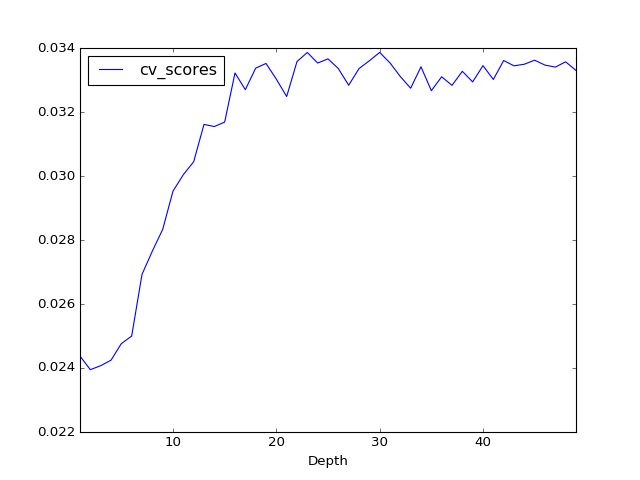

In [9]:
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
%matplotlib notebook
Depth = range(1,50)
score = []
for i in Depth:
      treereg = DecisionTreeRegressor(max_depth=i)
      scores = cross_val_score(treereg, X, y, cv=10, scoring='mean_squared_error')
      score.append(np.mean(np.sqrt(-scores)))

Depth_Choice_df = pd.DataFrame({'cv_scores': score ,'Depth': Depth})
Depth_Choice_df.plot(x ='Depth',y = 'cv_scores' )

In [10]:
# our best model has depth 2 - this is very interesting!
treereg = DecisionTreeRegressor(max_depth=2)
treereg.fit(X,y)
ImportanceDataFrame = pd.DataFrame({'feature':X.columns.values, 'importance':treereg.feature_importances_})
ImportanceDataFrame.sort_values(by = ['importance'],ascending = 0)


,feature,importance
3,lnx,0.526694
12,age_4,0.473306
0,nkids,0.000000
1,nkids2,0.000000
2,nadults,0.000000
4,salcohol,0.000000
5,region_brussels,0.000000
6,region_walloon,0.000000
7,occupation_bluecol,0.000000
8,occupation_whitecol,0.000000


it sounds like lnx (how much money they had) and age_4 (the older population) are the most important features of this dataset. None of the other variables seem to affect our rate.

In [11]:
preds = treereg.predict(X)
# our MSE
MSE_Train = np.sqrt(metrics.mean_squared_error(y, preds))
print(MSE_Train)  # our MSE is 0.02398

0.0239825459193


#### Now, let's treat stobacco as a dummy variable to distinguish between those who smoke and who do not. We then need to use decision tree classifier to identify the most important features that may affect probability of smoking.

In [12]:
TobaccoData['smoke'] = '1'
mask_cat0 = (TobaccoData['stobacco'] == 0)   

TobaccoData.loc[mask_cat0,'smoke'] = '0'
del TobaccoData['stobacco']
TobaccoData.head()

,nkids,nkids2,nadults,lnx,salcohol,region_brussels,region_walloon,occupation_bluecol,occupation_whitecol,age_1,age_2,age_3,age_4,smoke
0,1,0,2,14.19054,0.000000,0,0,1,0,0,1,0,0,0
1,0,0,3,13.90857,0.002285,0,0,0,0,0,0,1,0,0
2,0,0,1,13.97461,0.012875,0,0,0,1,0,1,0,0,0
3,1,0,2,13.76281,0.005907,0,0,1,0,0,1,0,0,0
4,2,0,1,13.80800,0.021981,0,0,0,0,0,1,0,0,0


In [13]:
X = TobaccoData[TobaccoData.columns.values]
y = TobaccoData.smoke
del X['smoke']

In [14]:
from sklearn.tree import DecisionTreeClassifier
TreeClass = DecisionTreeClassifier(
                max_depth = 2,
                min_samples_leaf = 5)
TreeClass.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

<IPython.core.display.Javascript object>


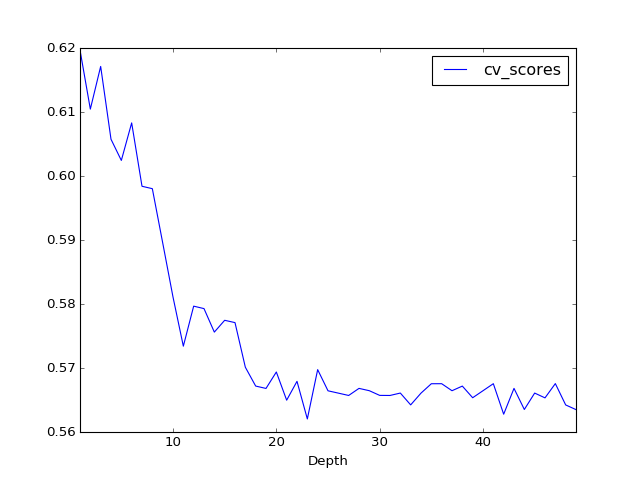

In [16]:
Depth = range(1,50)
score = []
for i in Depth:
      TreeClass = DecisionTreeClassifier(
                max_depth = i,
                min_samples_leaf = 5)
      scores = cross_val_score(TreeClass, X, y, cv=10)
      score.append(np.mean(scores))

Depth_Choice_df = pd.DataFrame({'cv_scores': score ,'Depth': Depth})
Depth_Choice_df.plot(x ='Depth',y = 'cv_scores' )

In [17]:
# it sounds like depth = 1 and 3 gives the best values - we can choose either. Both are simple
# to interpret. May be depth = 3 is better to interpret.
TreeClass = DecisionTreeClassifier(
                max_depth = 3,
                min_samples_leaf = 5)
TreeClass.fit(X,y)
ImportanceDataFrame = pd.DataFrame({'feature':X.columns.values, 'importance':TreeClass.feature_importances_})
ImportanceDataFrame.sort_values(by = ['importance'],ascending = 0)

# Based on depth = 3, age_4, lnx (total expenditure), being Whitecolor, nadults, and salchohol seem to have 
# the highest effect on probability of smoking

,feature,importance
12,age_4,0.529598
3,lnx,0.209674
8,occupation_whitecol,0.097007
2,nadults,0.085212
4,salcohol,0.078509
0,nkids,0.000000
1,nkids2,0.000000
5,region_brussels,0.000000
6,region_walloon,0.000000
7,occupation_bluecol,0.000000


In [18]:
TreeClass = DecisionTreeClassifier(
                max_depth = 1,
                min_samples_leaf = 5)
TreeClass.fit(X,y)
ImportanceDataFrame = pd.DataFrame({'feature':X.columns.values, 'importance':TreeClass.feature_importances_})
ImportanceDataFrame.sort_values(by = ['importance'],ascending = 0)
# if depth = 1, then age_4 seems to be the most important contributer to probability of smoking

,feature,importance
12,age_4,1
0,nkids,0
1,nkids2,0
2,nadults,0
3,lnx,0
4,salcohol,0
5,region_brussels,0
6,region_walloon,0
7,occupation_bluecol,0
8,occupation_whitecol,0
